In [26]:
import numpy as np
import pandas as pd

A company has several orders to process. For each order we must complete a certain task with a given effort (the actual time required to complete the task). We want to distribute the total effort among the teams (team_A, team_B, team_C).

#### Generate data

Generate a dataframe with 3 columns:

**Order**: "order_1", "order_2", ...

**Task**: random choice between ["task_1", "task_2", "task_3", "task_4"]

**Effort**: random int uniformly distributed in range (5, 20)

In [27]:
n_orders = 10

df = pd.DataFrame({
    "Order": ["order_{}".format(i) for i in range(1, n_orders+1)],
    "Task": np.random.choice(["task_1", "task_2", "task_3", "task_4"], size=n_orders),
    "Effort": np.random.uniform(5, 20, size=n_orders).astype(int) # in hours
})

In [28]:
df

,Order,Task,Effort
0,order_1,task_3,6
1,order_2,task_4,5
2,order_3,task_1,14
3,order_4,task_3,7
4,order_5,task_3,5
5,order_6,task_3,16
6,order_7,task_3,12
7,order_8,task_2,10
8,order_9,task_4,10
9,order_10,task_1,7


#### Calculate total effort by task

In [29]:
df = df.groupby(by=['Task']).sum()

In [30]:
df

,Effort
Task,
task_1,21
task_2,10
task_3,46
task_4,15


In [31]:
df = df.reset_index()

In [32]:
df

,Task,Effort
0,task_1,21
1,task_2,10
2,task_3,46
3,task_4,15


In [33]:
df['Effort'].sum()

92

<BarContainer object of 4 artists>

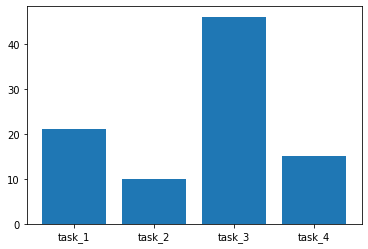

In [34]:
import matplotlib.pyplot as plt

plt.bar(df['Task'], df['Effort'])

#### Each team can handle only specific tasks.

**team_A**: task_1, task_2

**team_B**: task_1, task_3

**team_C**: task_2, task_4

Build a dataframe with two columns:

**Task**

**Team**

If a task can be handled by more than one team the row must be repeated

In [35]:
d = {
    "team_A": ["task_1", "task_2"],
     "team_B": ["task_1", "task_3"],
     "team_C": ["task_2", "task_4"]
}

In [36]:
for team, tasks in d.items():
    for task in tasks:
        print("{} --> {}".format(team, tasks))

team_A --> ['task_1', 'task_2']
team_A --> ['task_1', 'task_2']
team_B --> ['task_1', 'task_3']
team_B --> ['task_1', 'task_3']
team_C --> ['task_2', 'task_4']
team_C --> ['task_2', 'task_4']


In [37]:
df_task_team = pd.DataFrame()

for team, tasks in d.items():
    for task in tasks:
        df_task_team = df_task_team.append({"Task": task, "Team": team}, ignore_index=True)

In [38]:
df_task_team

,Task,Team
0,task_1,team_A
1,task_2,team_A
2,task_1,team_B
3,task_3,team_B
4,task_2,team_C
5,task_4,team_C


In [39]:
df_task_team = df_task_team.drop_duplicates()

#### Distribute effort among teams. If two or more teams can handle a task, then the effort must be divided equally among these teams.

In [40]:
df = df.merge(df_task_team, on=['Task'])

In [41]:
df

,Task,Effort,Team
0,task_1,21,team_A
1,task_1,21,team_B
2,task_2,10,team_A
3,task_2,10,team_C
4,task_3,46,team_B
5,task_4,15,team_C


In [42]:
df.groupby(by=['Task'])['Team'].count()

Task
task_1    2
task_2    2
task_3    1
task_4    1
Name: Team, dtype: int64

In [43]:
df['N_teams'] = df.groupby(by=['Task'])['Team'].transform('count')
df

,Task,Effort,Team,N_teams
0,task_1,21,team_A,2
1,task_1,21,team_B,2
2,task_2,10,team_A,2
3,task_2,10,team_C,2
4,task_3,46,team_B,1
5,task_4,15,team_C,1


In [44]:
df['TeamEffort'] = df['Effort']/df['N_teams']
df

,Task,Effort,Team,N_teams,TeamEffort
0,task_1,21,team_A,2,10.5
1,task_1,21,team_B,2,10.5
2,task_2,10,team_A,2,5.0
3,task_2,10,team_C,2,5.0
4,task_3,46,team_B,1,46.0
5,task_4,15,team_C,1,15.0


In [45]:
df['TeamEffort'].sum()

92.0

In [46]:
df.groupby(by=['Team'])['TeamEffort'].sum()

Team
team_A    15.5
team_B    56.5
team_C    20.0
Name: TeamEffort, dtype: float64

<BarContainer object of 3 artists>

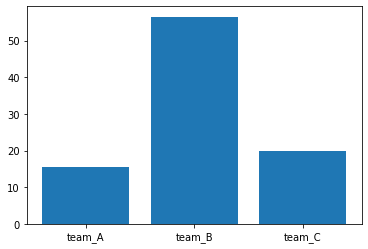

In [47]:
import matplotlib.pyplot as plt

effort_by_team = df.groupby(by=['Team'])['TeamEffort'].sum()

plt.bar(effort_by_team.index, effort_by_team)